<a href="https://colab.research.google.com/github/rehsani/ResBazAZ2021/blob/main/ResBazAZ_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/drive/1Q-8w8y3cd-dUrsanplITsB8S1XqdcCLw#scrollTo=acuW23UyGone"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

## Objective and Approach

In this workshop, we assumes that you know close to nothing about Machine Learning. This workshop's goal is to introcduce you the concepts, tools, and intuition you need to implement programs capable of learning from data.

We will cover a few techniques, from the simplest and most commonly used Linear Regression to Decision Trees and Random Forests. Rather than implementing our own toy versions of each algorithm, we will be using **Scikit-Learn** which is very easy to use, yet it implements many Machine Learning algorithms efficiently, so it makes for a great entry point to learning Machine Learning.

[Scikit-Learn](https://scikit-learn.org/stable/) is very easy to use, and was created by David Cournapeau in 2007, and is now led by a team of researchers at the French Institute for Research in Computer Science and Automation (Inria).

## Prerequisites

We assumes that you have some Python programming experience and that you are familiar with Python‚Äôs main scientific libraries‚Äîin particular, NumPy, pandas, and Matplotlib.

Also, if you care about what‚Äôs under the hood, you should have a reasonable understanding of college-level math as well (calculus, linear algebra, probabilities, and statistics).

## Roadmap



*   What Machine Learning is, what problems it tries to solve, and the main     categories and fundamental concepts of its systems

*   The steps in a typical Machine Learning project

*   Learning by fitting a model to data

* The most common learning algorithms: Linear and Polynomial Regression, Decision Trees, and Random Forests.



## Other Resources

Many excellent resources are available to learn about Machine Learning. For example, **Andrew Ng**‚Äôs ML course on **Coursera** is amazing, although it requires a significant time investment (think months).

There are also many interesting websites about Machine Learning, including of course **[Scikit-Learn](https://scikit-learn.org/stable/getting_started.html)**‚Äôs exceptional **User Guide**. You may also enjoy **Dataquest**, which provides very nice interactive tutorials, and ML blogs such as those listed on **Quora**. 

There are many other introductory books about Machine Learning. In particular:

*   Joel Grus‚Äôs Data Science from Scratch (O‚ÄôReilly) presents the fundamentals of Machine Learning and implements some of the main algorithms in pure Python (from scratch, as the name suggests).

*   Stephen Marsland‚Äôs Machine Learning: An Algorithmic Perspective (Chapman & Hall) is a great introduction to Machine Learning, covering a wide range of topics in depth with code examples in Python (also from scratch, but using NumPy).


# **The Fundamentals of Machine Learning**

# The Machine Learning Landscape

**Discussion**: What do you picture in your mind when you hear "Machine Learning"?

**Question 1:** What was the last time you manually filtered an email as spam?

**Question 2:** We are using Machine Learning in our daily lives, what are some examples?

**Question 3:** If I download a copy of Wikipedia, has my computer really learned something?

---

When most people hear ‚ÄúMachine Learning,‚Äù they picture a robot: a dependable butler or a deadly Terminator, depending on whom you ask. But Machine Learning is not just a futuristic fantasy; it‚Äôs already here. In fact, it has been around for decades in some specialized applications, such as Optical Character Recognition (OCR). But the first ML application that really became mainstream, improving the lives of hundreds of millions of people, took over the world back in the 1990s: the spam filter. It‚Äôs not exactly a self-aware Skynet, but it does technically qualify as Machine Learning (it has actually learned so well that you seldom need to flag an email as spam anymore). It was followed by hundreds of ML applications that now quietly power hundreds of products and features that you use regularly, from better recommendations to voice search.




Where does Machine Learning start and where does it end? What exactly does it 

mean for a machine to learn something? If I download a copy of Wikipedia, has my computer really learned something? Is it suddenly smarter? In this part of the workshop we will start by clarifying what Machine Learning is and why you may want to use it.

Then, before we set out to explore the Machine Learning continent, we will take a look at the map and learn about the main regions and the most notable landmarks: **supervised** versus **unsupervised learning**, **online** versus **batch learning**, **instance-based** versus **model-based** learning. Then we will look at the workflow of a typical ML project, discuss the main challenges you may face, and cover how to evaluate and fine-tune a Machine Learning system.

We will introduces a lot of fundamental concepts (and jargon) that every data scientist should know by heart. It will be a high-level overview, all rather simple, but you should make sure everything is crystal clear to you before we continue. So grab a coffee and let‚Äôs get started and please feel free to ask questions!



# What is Machine Learning?

Machine Learning is the science (and art) of programming computers so they can learn from data. Here is a slightly more general definition:

*Machine Learning is the field of study that gives computers the ability to learn without being explicitly programmed.* (Arthur Samuel, 1959)

And a more engineering-oriented one:

*A computer program is said to learn from experience E with respect to some task T and some performance measure P, if its performance on T, as measured by P, improves with experience E.* (Tom Mitchell, 1997)

The spam filter is a Machine Learning program that, given examples of spam emails (e.g., flagged by users) and examples of regular (nonspam, also called ‚Äúham‚Äù) emails, can learn to flag spam. The examples that the system uses to learn are called the **training set**. Each training example is called a **training instance** (or sample). In this case, the task **T** is to flag spam for new emails, the experience **E** is the training data, and the performance measure **P** needs to be defined; for example, you can use the ratio of correctly classified emails. This particular performance measure is called **accuracy**, and it is often used in **classification** tasks.

If you just download a copy of Wikipedia, your computer has a lot more data, but it is not suddenly better at any task. Thus, downloading a copy of Wikipedia is not Machine Learning.

# Why Use Machine Learning?

Consider how you would write a spam filter using traditional programming techniques: 



1.   First you would consider what spam typically looks like. You might notice that some words or phrases (such as ‚Äú4U,‚Äù ‚Äúcredit card,‚Äù ‚Äúfree,‚Äù and ‚Äúamazing‚Äù) tend to come up a lot in the subject line. Perhaps you would also notice a few other patterns in the sender‚Äôs name, the email‚Äôs body, and other parts of the email.
2.   You would write a detection algorithm for each of the patterns that you noticed, and your program would flag emails as spam if a number of these patterns were detected.

3. You would test your program and repeat steps 1 and 2 until it was good enough to launch.

Since the problem is difficult, your program will likely become a long list of complex rules‚Äîpretty hard to maintain.

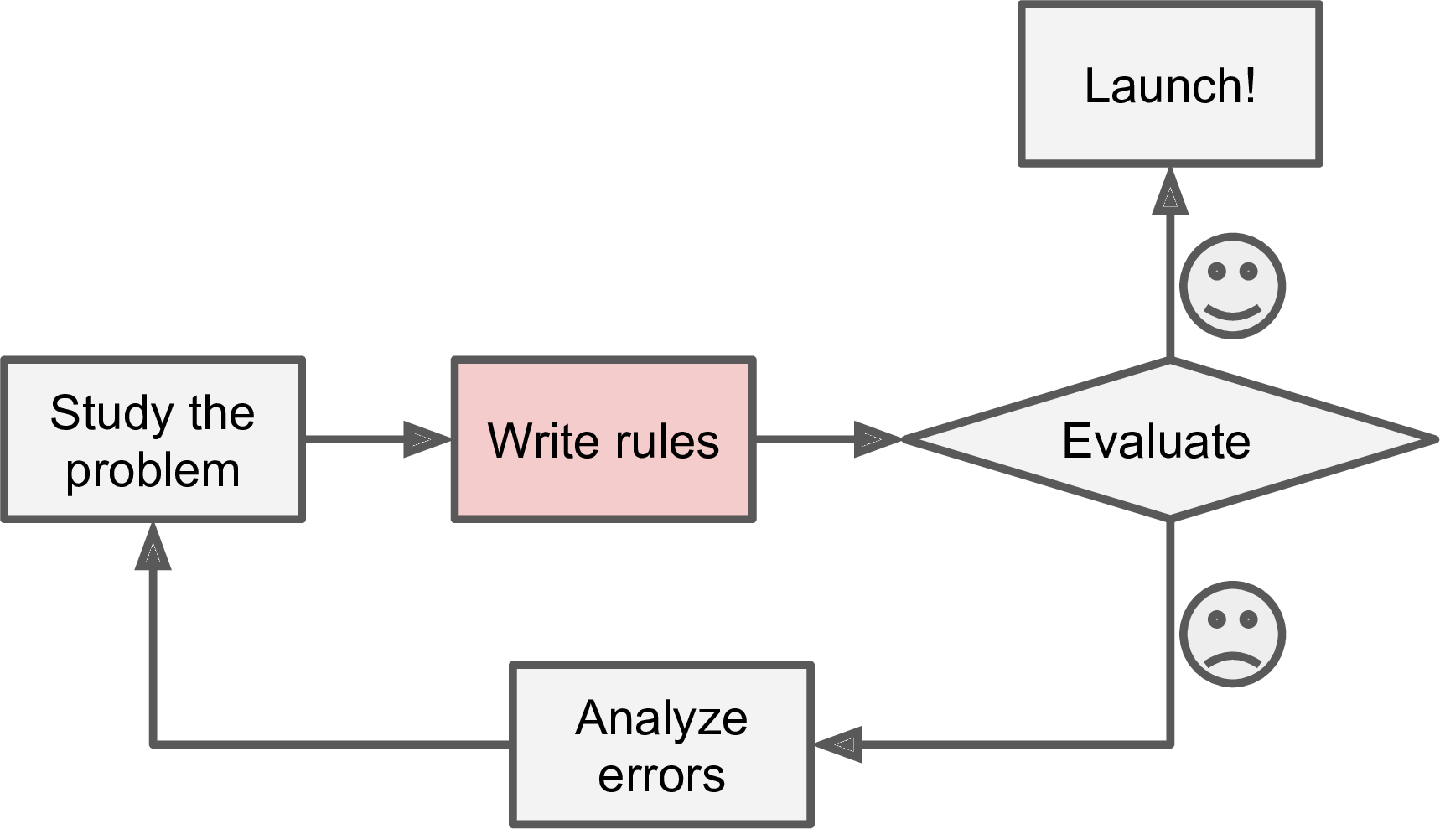

In contrast, a spam filter based on Machine Learning techniques **automatically** learns which words and phrases are good predictors of spam by detecting unusually frequent patterns of words in the spam examples compared to the ham examples. The program is much shorter, easier to maintain, and most likely more accurate.

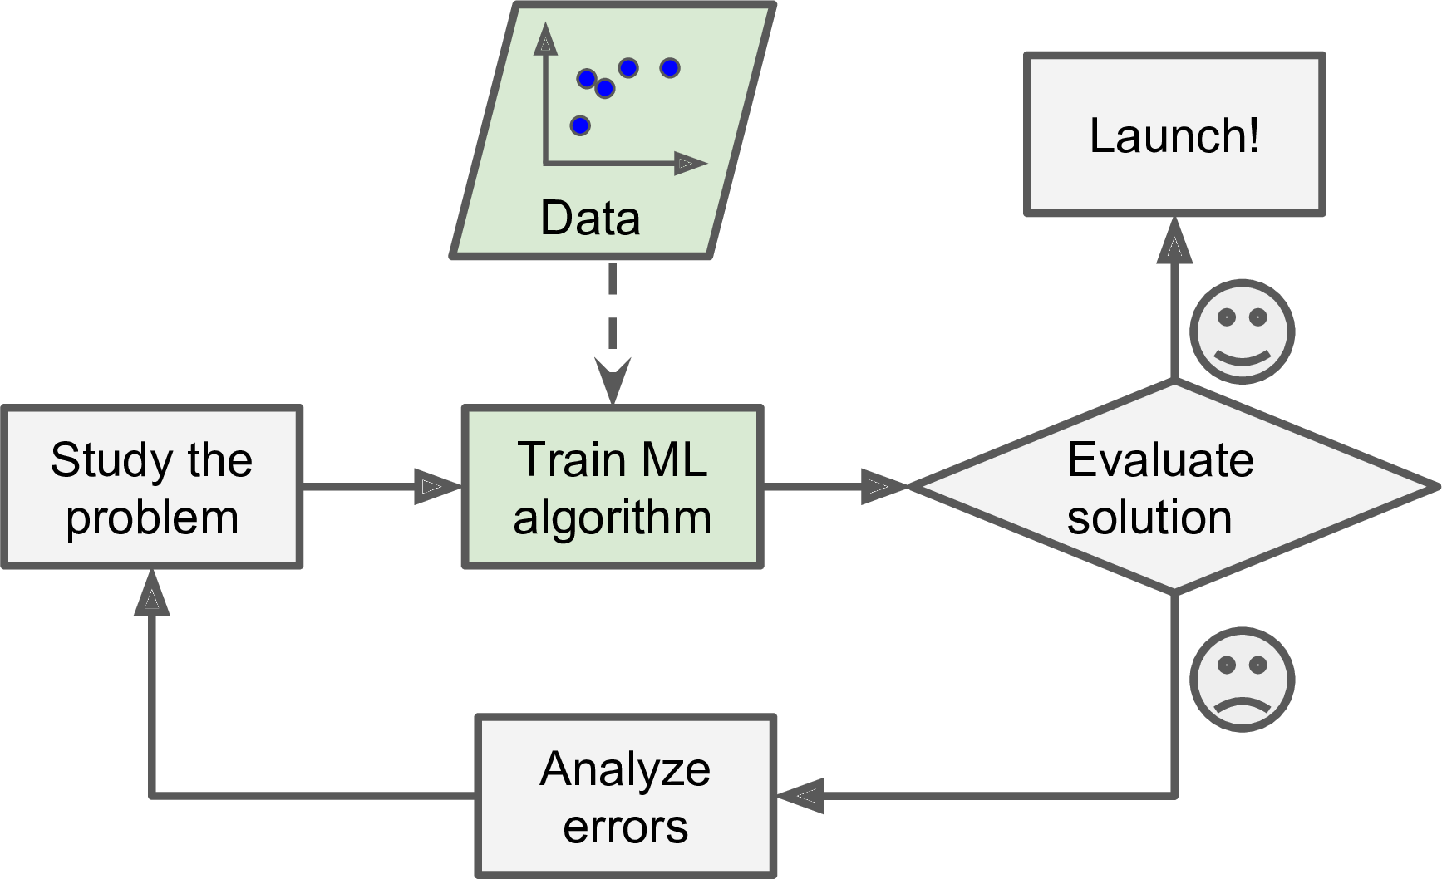

What if spammers notice that all their emails containing ‚Äú4U‚Äù are blocked? They might start writing ‚ÄúFor U‚Äù instead. A spam filter using traditional programming techniques would need to be updated to flag ‚ÄúFor U‚Äù emails. If spammers keep working around your spam filter, you will need to keep writing new rules forever.

In contrast, a spam filter based on Machine Learning techniques automatically notices that ‚ÄúFor U‚Äù has become unusually frequent in spam flagged by users, and it starts flagging them without your intervention.


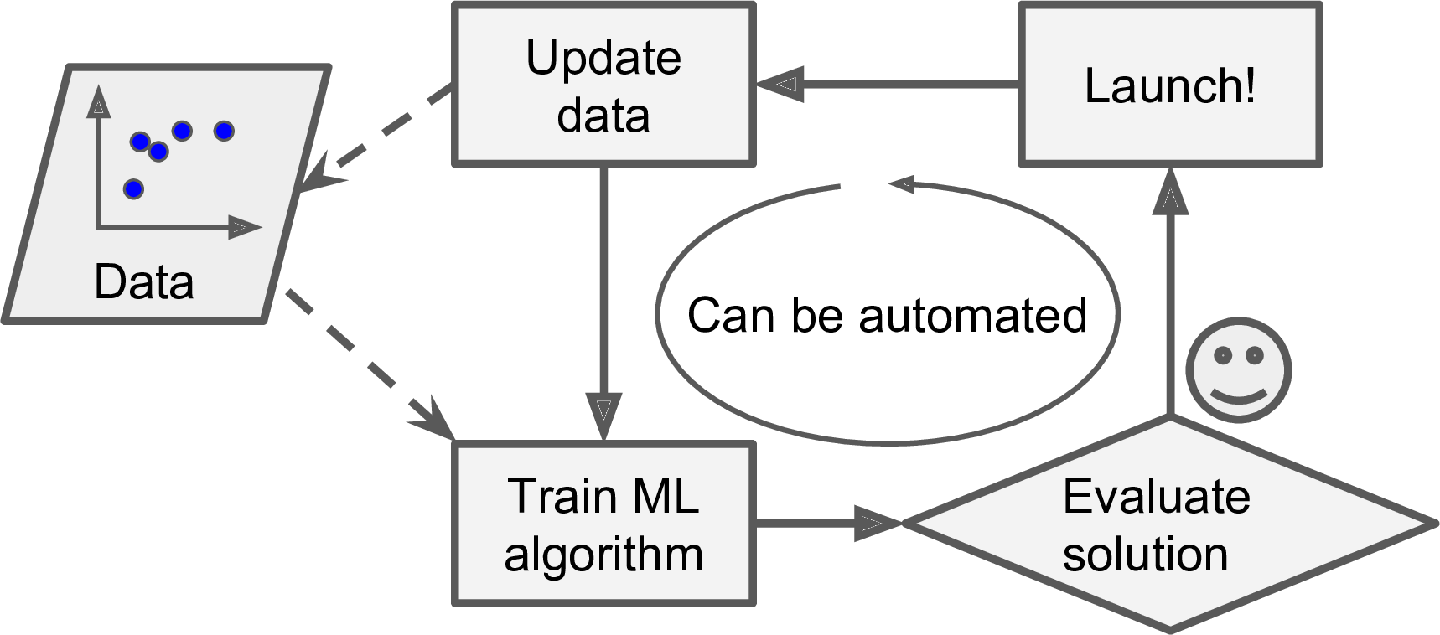






Another area where Machine Learning shines is for problems that either are too complex for traditional approaches or have no known algorithm. For example, consider speech recognition. Say you want to start simple and write a program capable of distinguishing the words ‚Äúone‚Äù and ‚Äútwo.‚Äù You might notice that the word ‚Äútwo‚Äù starts with a high-pitch sound (‚ÄúT‚Äù), so you could hardcode an algorithm that measures high-pitch sound intensity and use that to distinguish ones and twos‚Å†‚Äîbut obviously this technique will not scale to thousands of words spoken by millions of very different people in noisy environments and in dozens of languages. The best solution (at least today) is to write an algorithm that learns by itself, given many example recordings for each word.

Finally, Machine Learning can help humans learn. ML algorithms can be inspected to see what they have learned (although for some algorithms this can be tricky). For instance, once a spam filter has been trained on enough spam, it can easily be inspected to reveal the list of words and combinations of words that it believes are the best predictors of spam. Sometimes this will reveal unsuspected correlations or new trends, and thereby lead to a better understanding of the problem. Applying ML techniques to dig into large amounts of data can help discover patterns that were not immediately apparent. This is called data mining.

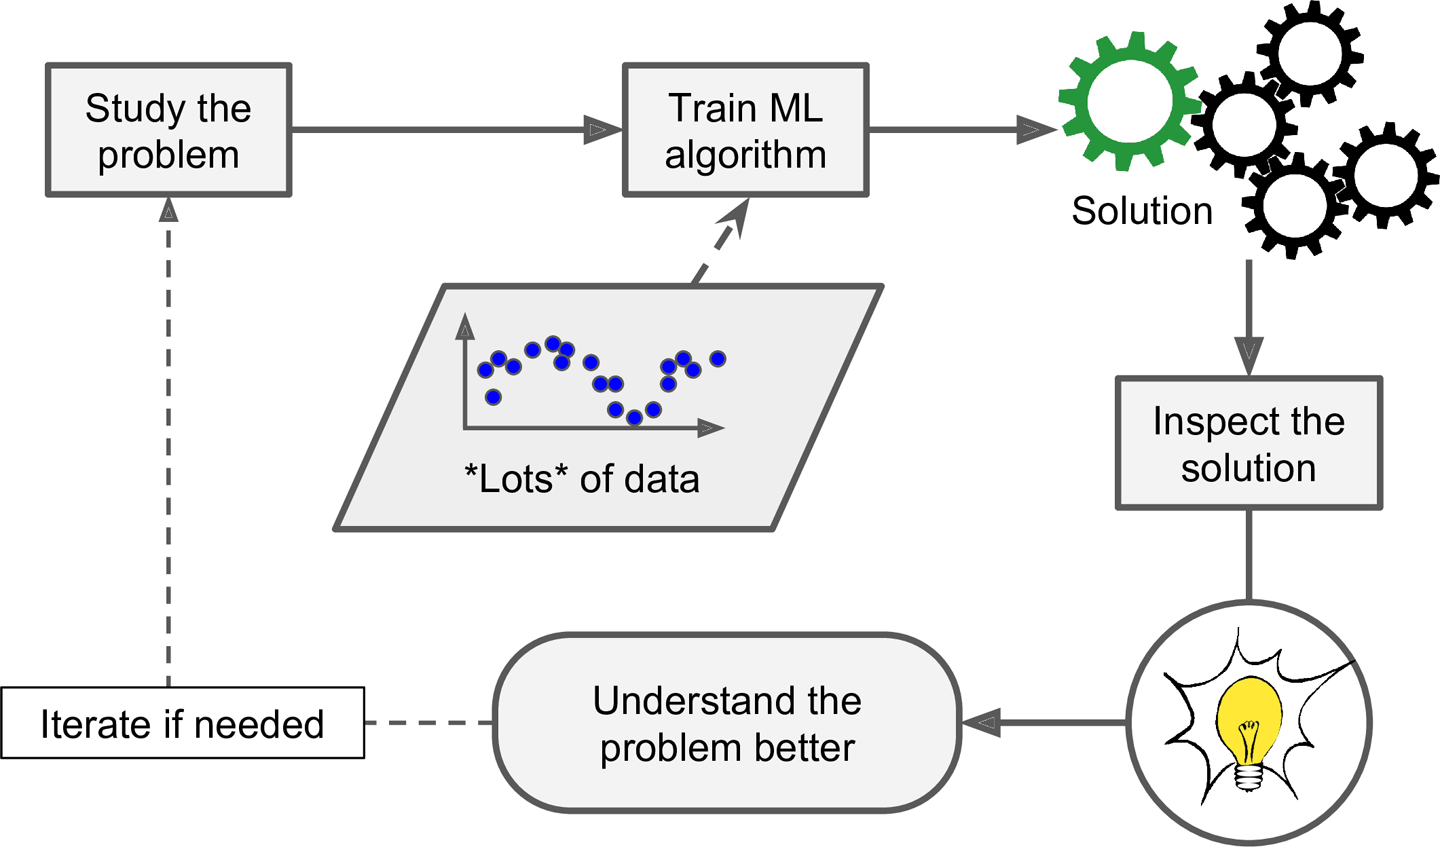


To summarize, Machine Learning is great for:

* Problems for which existing solutions require a lot of fine-tuning or long lists of rules: one Machine Learning algorithm can often simplify code and perform better than the traditional approach.

* Complex problems for which using a traditional approach yields no good solution: the best Machine Learning techniques can perhaps find a solution.

* Fluctuating environments: a Machine Learning system can adapt to new data.

* Getting insights about complex problems and large amounts of data.

## Types of Machine Learning Systems

There are so many different types of Machine Learning systems that it is useful to classify them in broad categories, based on the following criteria:

*   Whether or not they are trained with human supervision (supervised, unsupervised, semisupervised, and Reinforcement Learning)

*   Whether or not they can learn incrementally on the fly (online versus batch learning)

*   Whether they work by simply comparing new data points to known data points, or instead by detecting patterns in the training data and building a predictive model, much like scientists do (instance-based versus model-based learning)

These criteria are not exclusive; you can combine them in any way you like. For example, a state-of-the-art spam filter may learn on the fly using a deep neural network model trained using examples of spam and ham; this makes it an online, model-based, supervised learning system.

Let‚Äôs look at each of these criteria a bit more closely.

## Supervised Learning


Machine Learning systems can be classified according to the amount and type of supervision they get during training. There are four major categories: supervised learning, unsupervised learning, semisupervised learning, and Reinforcement Learning.

In supervised learning, the training set you feed to the algorithm includes the desired solutions, called **labels**.

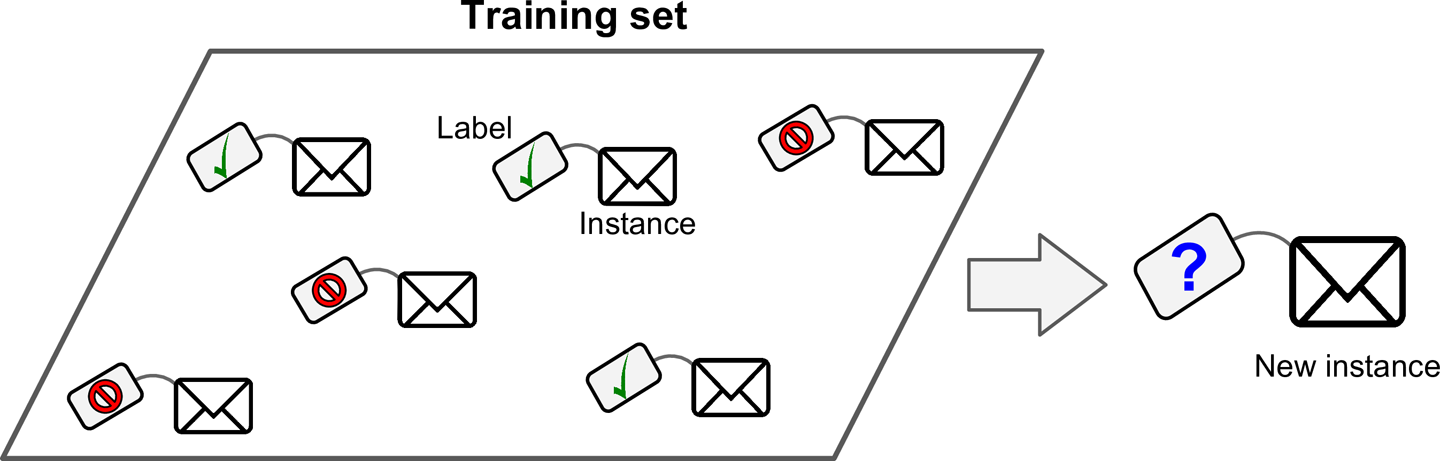

A typical supervised learning task is **classification**. The spam filter is a good example of this: it is trained with many example emails along with their class (spam or ham), and it must learn how to classify new emails.

Another typical task is to predict a target numeric value, such as the price of a car, given a set of features (mileage, age, brand, etc.) called predictors. This sort of task is called **regression**. To train the system, you need to give it many examples of cars, including both their predictors and their labels (i.e., their prices).

Note that some regression algorithms can be used for classification as well, and vice versa. For example, Logistic Regression is commonly used for classification, as it can output a value that corresponds to the probability of belonging to a given class (e.g., 20% chance of being spam).

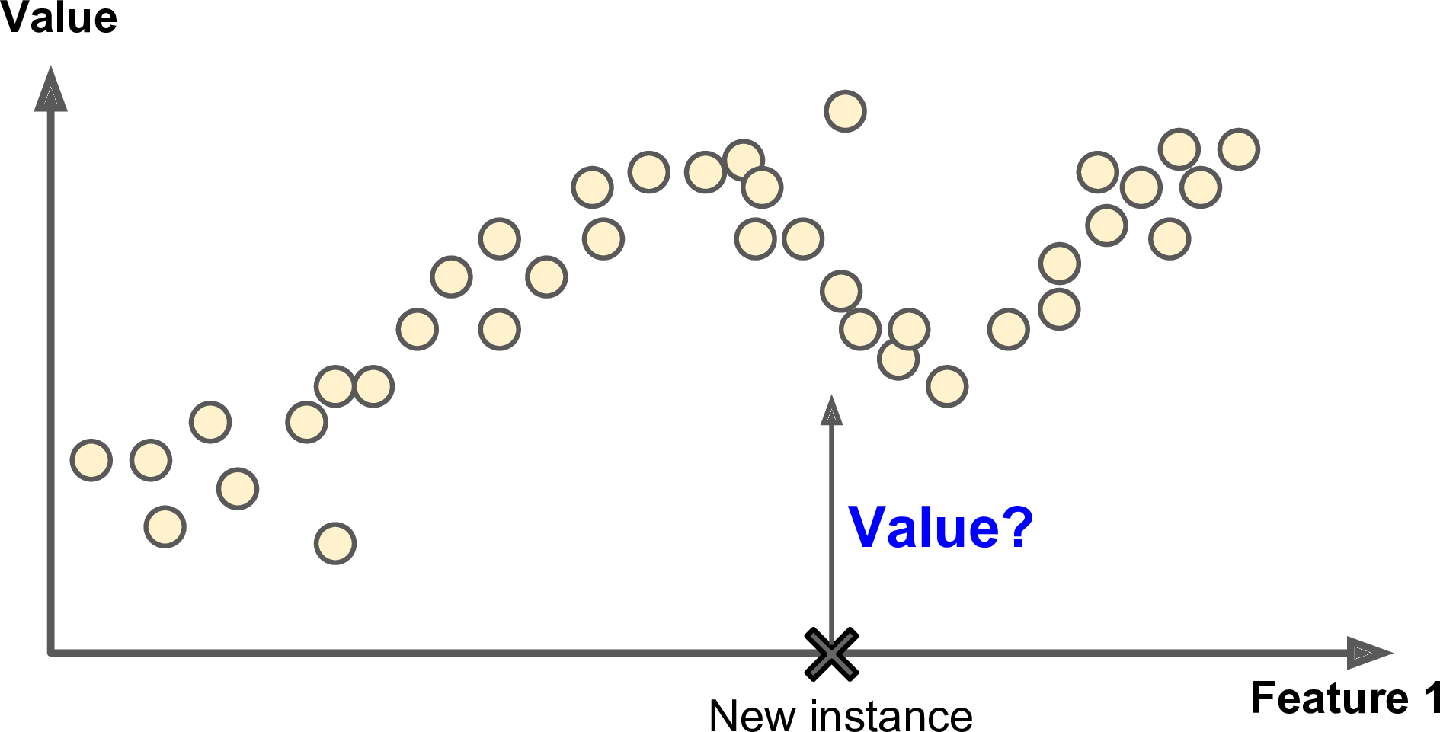


Here are some of the most important supervised learning algorithms:

*   k-Nearest Neighbors

*   Linear Regression (covered in this workshop)

*   Logistic Regression

*   Support Vector Machines (SVMs)

*   Decision Trees and Random Forests (covered in this workshop)

*   Neural networks

## Unsupervised and SemiSupervised Learning


In unsupervised learning, as you might guess, the training data is unlabeled. The system tries to learn without a teacher. 

Since labeling data is usually time-consuming and costly, you will often have plenty of unlabeled instances, and few labeled instances. Some algorithms can deal with data that‚Äôs partially labeled. This is called semisupervised learning.

We will not cover them in this workshop.

## Batch and Online Learning



In batch learning, the system is incapable of learning incrementally: it must be trained using all the available data. This will generally take a lot of time and computing resources, so it is typically done offline. First the system is trained, and then it is launched into production and runs without learning anymore; it just applies what it has learned. This is called offline learning.

In online learning, you train the system incrementally by feeding it data instances sequentially, either individually or in small groups called mini-batches. Each learning step is fast and cheap, so the system can learn about new data on the fly, as it arrives.



## Instance-Based Versus Model-Based Learning

One more way to categorize Machine Learning systems is by how they generalize. Most Machine Learning tasks are about making predictions. This means that given a number of training examples, the system needs to be able to make good predictions for (generalize to) examples it has never seen before. Having a good performance measure on the training data is good, but insufficient; the true goal is to perform well on new instances.

Possibly the most trivial form of learning is simply to learn by heart. If you were to create a spam filter this way, it would just flag all emails that are identical to emails that have already been flagged by users‚Äînot the worst solution, but certainly not the best.

Instead of just flagging emails that are identical to known spam emails, your spam filter could be programmed to also flag emails that are very similar to known spam emails. This requires a measure of similarity between two emails. A (very basic) similarity measure between two emails could be to count the number of words they have in common. The system would flag an email as spam if it has many words in common with a known spam email.

This is called instance-based learning: the system learns the examples by heart, then generalizes to new cases by using a similarity measure to compare them to the learned examples (or a subset of them). For example, in this figure, the new instance would be classified as a triangle because the majority of the most similar instances belong to that class.

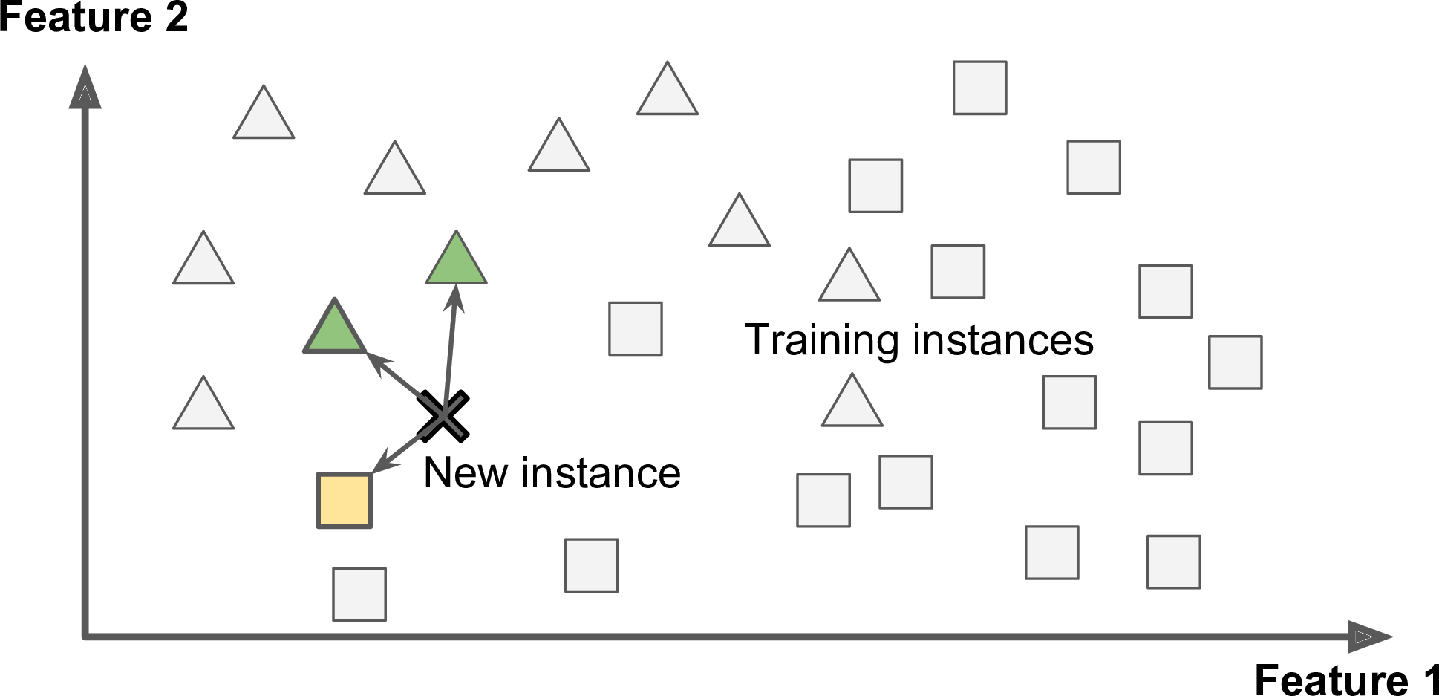

Another way to generalize from a set of examples is to build a model of these examples and then use that model to make predictions. This is called model-based learning.

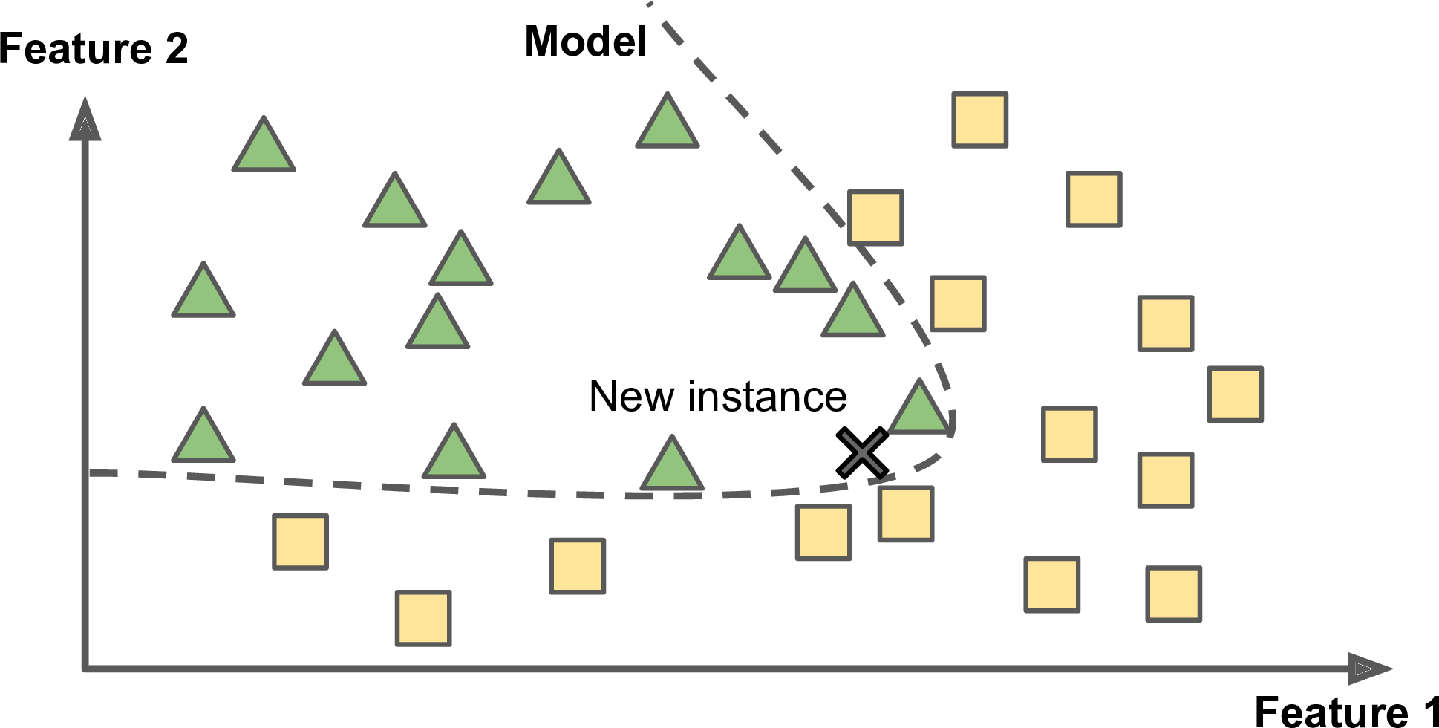

# **Example 1**

Suppose you want to know if money makes people happy, so you download the **Better Life Index** data from the [OECD‚Äôs website](https://stats.oecd.org/index.aspx?DataSetCode=BLI) and stats about gross domestic product (GDP) per capita from the [IMF‚Äôs website](https://www.imf.org/en/Publications/SPROLLs/world-economic-outlook-databases#sort=%40imfdate%20descending). Then you join the tables and sort by GDP per capita. I have prepared the function to do it.

First let import sklearn library:

In [1]:
# Scikit-Learn ‚â•0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [2]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [3]:
import os
datapath = os.path.join("datasets", "lifesat", "")

# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Download the data
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

In [4]:
# Code example
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",
                             thousands=',',
                             delimiter='\t',
                             encoding='latin1', 
                             na_values="n/a")

oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")

gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)

full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)

remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

Following table shows an excerpt of what you get if you run the code:

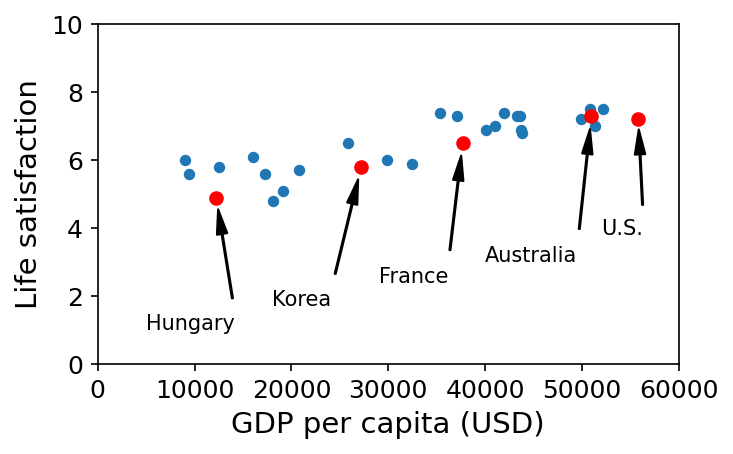

GDP per capita  Life satisfaction
Country                                         
Hungary             12239.894                4.9
Korea               27195.197                5.8
France              37675.006                6.5
Australia           50961.865                7.3
United States       55805.204                7.2

In [5]:
plt.rcParams['figure.dpi'] = 150
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
plt.xlabel("GDP per capita (USD)")
plt.show()

# does money make people happeier?
sample_data.to_csv(os.path.join("datasets", "lifesat", "lifesat.csv"))
sample_data.loc[list(position_text.keys())]


Let‚Äôs plot the data for these countries.


There does seem to be a trend here! Although the data is noisy (i.e., partly random), it looks like life satisfaction goes up more or less linearly as the country‚Äôs GDP per capita increases. 

So we decide to model life satisfaction as a linear function of GDP per capita. This step is called **model selection**: you selected a *linear model* of life satisfaction with just one attribute, GDP per capita

$$L_{S} = \theta_{0} + \theta_{1} * GDP$$

This model has two model parameters, Œ∏$_{0}$ and Œ∏$_{1}$ By tweaking these parameters, you can make your model represent any linear function, see next cell!



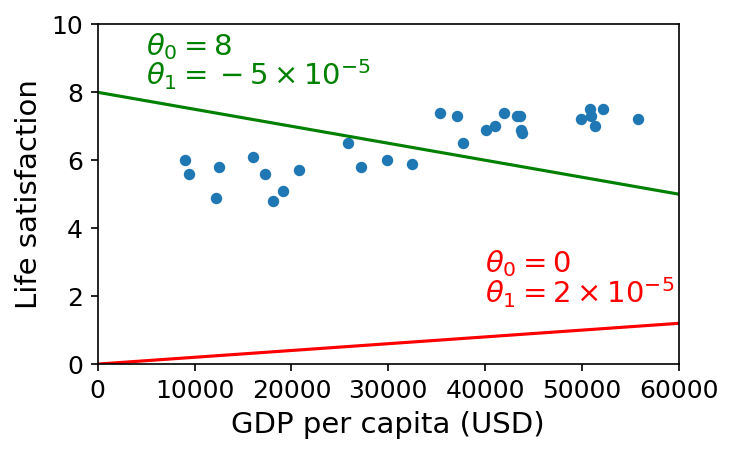

In [6]:
import numpy as np

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.xlabel("GDP per capita (USD)")
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, 2*X/100000, "r")
plt.text(40000, 2.7, r"$\theta_0 = 0$", fontsize=14, color="r")
plt.text(40000, 1.8, r"$\theta_1 = 2 \times 10^{-5}$", fontsize=14, color="r")
plt.plot(X, 8 - 5*X/100000, "g")
plt.text(5000, 9.1, r"$\theta_0 = 8$", fontsize=14, color="g")
plt.text(5000, 8.2, r"$\theta_1 = -5 \times 10^{-5}$", fontsize=14, color="g")
# plt.plot(X, 4 + 5*X/100000, "b")
# plt.text(5000, 3.5, r"$\theta_0 = 4$", fontsize=14, color="b")
# plt.text(5000, 2.6, r"$\theta_1 = 5 \times 10^{-5}$", fontsize=14, color="b")
plt.show()

Before you can use your model, you need to define the parameter values Œ∏$_{0}$ and Œ∏$_{1}$. **How can you know which values will make your model perform best?** To answer this question, you need to specify a **performance measure**. You can either define a utility function (or fitness function) that measures how **good** your model is, or you can define a cost function that measures how **bad** it is. 

*For Linear Regression problems, people typically use a cost function that measures the distance between the linear model‚Äôs predictions and the training examples; the objective is to minimize this distance.*

This is where the Linear Regression algorithm comes in: you feed it your training examples, and it finds the parameters that make the linear model fit best to your data. This is called **training** the model. In our case, the algorithm finds that the optimal parameter values are Œ∏$_{0}$ = 4.85 and Œ∏$_{1}$ = 4.91 √ó 10e‚Äì5.



# Your First Machine Learning Model

Now the model fits the training data as closely as possible (for a linear model), as you can see in next cell.


In [7]:
from sklearn import linear_model
lin1 = linear_model.LinearRegression()
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
lin1.fit(Xsample, ysample)
t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]
t0, t1

(4.853052800266436, 4.911544589158484e-05)

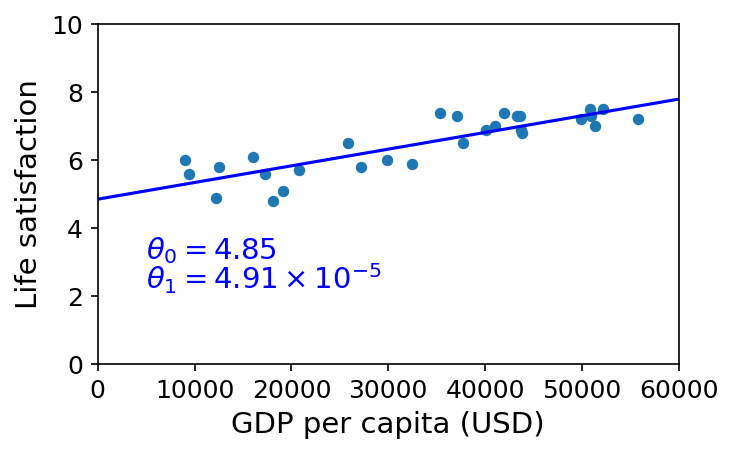

In [8]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.xlabel("GDP per capita (USD)")
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
plt.show()


You are finally ready to run the model to make predictions. For example, say you want to know how happy Cypriots are, and the OECD data does not have the answer. Fortunately, you can use your model to make a good prediction: you look up Cyprus‚Äôs GDP per capita, find $22,587, and then apply your model and find that life satisfaction is likely to be somewhere around 4.85 + 22,587 √ó 4.91 √ó 10e-5 = 5.96.



In [9]:
cyprus_gdp_per_capita = gdp_per_capita.loc["Cyprus"]["GDP per capita"]
print(cyprus_gdp_per_capita)
cyprus_predicted_life_satisfaction = lin1.predict([[cyprus_gdp_per_capita]])[0][0]
cyprus_predicted_life_satisfaction

22587.49


5.96244744318815

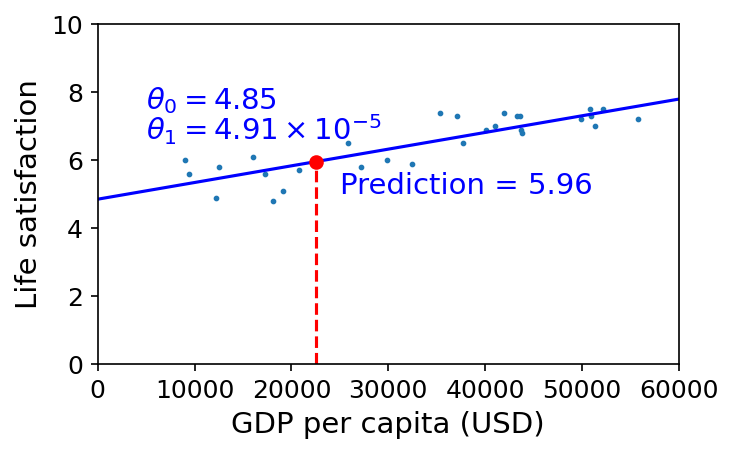

In [10]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3), s=3)
plt.xlabel("GDP per capita (USD)")
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.axis([0, 60000, 0, 10])
plt.text(5000, 7.5, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 6.6, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
plt.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita], [0, cyprus_predicted_life_satisfaction], "r--")
plt.text(25000, 5.0, r"Prediction = 5.96", fontsize=14, color="b")
plt.plot(cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction, "ro")
plt.show()

If all went well, your model will make good predictions. If not, you may need to use more attributes (employment rate, health, air pollution, etc.), get more or better-quality training data, or perhaps select a more powerful model (e.g., a Polynomial Regression model).

In summary:

*   You studied the data.

*   You selected a model.

*   You trained it on the training data (i.e., the learning algorithm searched for the model parameter values that minimize a cost function).

*   Finally, you applied the model to make predictions on new cases (this is called inference), hoping that this model will generalize well.

This is what a typical Machine Learning project looks like. In continue we will experience this firsthand by going through a more comprehensive example.

We have covered a lot of ground so far: you now know what Machine Learning is really about, why it is useful, what some of the most common categories of ML systems are, and what a typical project workflow looks like. Now let‚Äôs look at what can go wrong in learning and prevent you from making accurate predictions.

# Main Challenges of Machine Learning

In short, since your main task is to select a learning algorithm and train it on some data, the two things that can go wrong are ‚Äúbad algorithm‚Äù and ‚Äúbad data.‚Äù Let‚Äôs start with examples of bad data.

## Insufficient Quantity of Training Data

For a toddler to learn what an apple is, all it takes is for you to point to an apple and say ‚Äúapple‚Äù (possibly repeating this procedure a few times). Now the child is able to recognize apples in all sorts of colors and shapes. Genius.

Machine Learning is not quite there yet; it takes a lot of data for most Machine Learning algorithms to work properly. Even for very simple problems you typically need thousands of examples, and for complex problems such as image or speech recognition you may need millions of examples (unless you can reuse parts of an existing model).

## Nonrepresentative Training Data

In order to generalize well, it is crucial that your training data be representative of the new cases you want to generalize to. This is true whether you use instance-based learning or model-based learning.

For example, the set of countries we used earlier for training the linear model was not perfectly representative; a few countries were missing. Following figure shows what the data looks like when you add the missing countries.



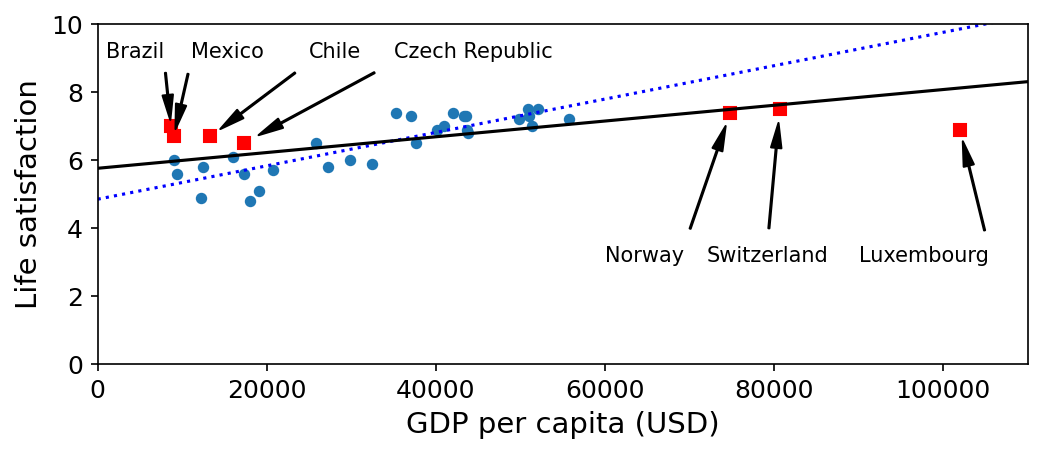

In [11]:
position_text2 = {
    "Brazil": (1000, 9.0),
    "Mexico": (11000, 9.0),
    "Chile": (25000, 9.0),
    "Czech Republic": (35000, 9.0),
    "Norway": (60000, 3),
    "Switzerland": (72000, 3.0),
    "Luxembourg": (90000, 3.0),
}

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,3))
plt.axis([0, 110000, 0, 10])

for country, pos_text in position_text2.items():
    pos_data_x, pos_data_y = missing_data.loc[country]
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "rs")

X=np.linspace(0, 110000, 1000)
plt.plot(X, t0 + t1*X, "b:")

lin_reg_full = linear_model.LinearRegression()
Xfull = np.c_[full_country_stats["GDP per capita"]]
yfull = np.c_[full_country_stats["Life satisfaction"]]
lin_reg_full.fit(Xfull, yfull)

t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_[0][0]
X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full + t1full * X, "k")
plt.xlabel("GDP per capita (USD)")
plt.show()

If you train a linear model on this data, you get the solid line, while the old model is represented by the dotted line. As you can see, not only does adding a few missing countries significantly alter the model, but it makes it clear that such a simple linear model is probably never going to work well. It seems that very rich countries are not happier than moderately rich countries (in fact, they seem unhappier), and conversely some poor countries seem happier than many rich countries.

By using a nonrepresentative training set, we trained a model that is unlikely to make accurate predictions, especially for very poor and very rich countries.

It is crucial to use a training set that is representative of the cases you want to generalize to. This is often harder than it sounds: if the sample is too small, you will have sampling noise (i.e., nonrepresentative data as a result of chance), but even very large samples can be nonrepresentative if the sampling method is flawed. This is called sampling bias.

## Examples of Sampling Bias

Perhaps the most famous example of sampling bias happened during the US presidential election in 1936, which pitted Landon against Roosevelt: the Literary Digest conducted a very large poll, sending mail to about 10 million people. It got 2.4 million answers, and predicted with high confidence that Landon would get 57% of the votes. Instead, Roosevelt won with 62% of the votes. The flaw was in the Literary Digest‚Äôs sampling method:

First, to obtain the addresses to send the polls to, the Literary Digest used telephone directories, lists of magazine subscribers, club membership lists, and the like. All of these lists tended to favor wealthier people, who were more likely to vote Republican (hence Landon).

Second, less than 25% of the people who were polled answered. Again this introduced a sampling bias, by potentially ruling out people who didn‚Äôt care much about politics, people who didn‚Äôt like the Literary Digest, and other key groups. This is a special type of sampling bias called **nonresponse bias**.

Here is another example: say you want to build a system to recognize Progressive Rock music ü§ò videos. One way to build your training set is to search for prog rok music‚Äù on YouTube and use the resulting videos. But this assumes that YouTube‚Äôs search engine returns a set of videos that are representative of all the rock music videos on YouTube. In reality, the search results are likely to be biased toward popular artists (and if you live in Brazil you will get a lot of similar videos, which sound nothing like **Steven Wilson** ü§òü§ò). On the other hand, how else can you get a large training set?

## Poor-Quality Data

Obviously, if your training data is full of errors, outliers, and noise (e.g., due to poor-quality measurements), it will make it harder for the system to detect the underlying patterns, so your system is less likely to perform well. It is often well worth the effort to spend time cleaning up your training data. The truth is, most data scientists spend a significant part of their time doing just that. The following are a couple of examples of when you‚Äôd want to clean up training data:

*   If some instances are clearly outliers, it may help to simply discard them or try to fix the errors manually.

*   If some instances are missing a few features (e.g., 5% of your customers did not specify their age), you must decide whether you want to ignore this attribute altogether, ignore these instances, fill in the missing values (e.g., with the median age), or train one model with the feature and one model without it.

## Irrelevant Features

As the saying goes: **garbage in, garbage out**. Your system will only be capable of learning if the training data contains enough relevant features and not too many irrelevant ones. A critical part of the success of a Machine Learning project is coming up with a good set of features to train on. This process, called feature engineering, involves the following steps:

* Feature selection (selecting the most useful features to train on among existing features)

* Feature extraction (combining existing features to produce a more useful one‚Å†, dimensionality reduction algorithms can help)

* Creating new features by gathering new data

Now that we have looked at many examples of bad data, let‚Äôs look at a couple of examples of bad algorithms.

## Overfitting the Training Data (Very Important)

Say you are visiting a foreign country and the taxi driver rips you off. You might be tempted to say that all taxi drivers in that country are thieves. **Overgeneralizing** is something that we humans do all too often, and unfortunately machines can fall into the same trap if we are not careful. In Machine Learning this is called **overfitting**: *it means that the model performs well on the training data, but it does not generalize well*.

This figure shows an example of a high-degree polynomial life satisfaction model that strongly overfits the training data. Even though it performs much better on the training data than the simple linear model, would you really trust its predictions?

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1544: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


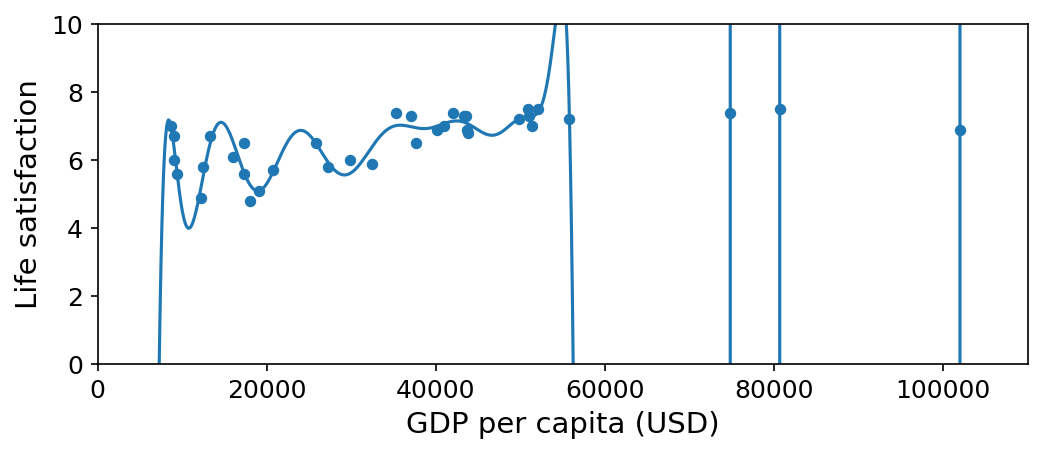

In [12]:
full_country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,3))
plt.axis([0, 110000, 0, 10])

from sklearn import preprocessing
from sklearn import pipeline

poly = preprocessing.PolynomialFeatures(degree=60, include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg2 = linear_model.LinearRegression()

pipeline_reg = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lin_reg2)])
pipeline_reg.fit(Xfull, yfull)
curve = pipeline_reg.predict(X[:, np.newaxis])
plt.plot(X, curve)
plt.xlabel("GDP per capita (USD)")
plt.show()

Complex models such as deep neural networks can detect subtle patterns in the data, but if the training set is noisy, or if it is too small (which introduces sampling noise), then the model is likely to detect patterns in the noise itself. Obviously these patterns will not generalize to new instances. For example, say you feed your life satisfaction model many more attributes, including uninformative ones such as the country‚Äôs name. In that case, a complex model may detect patterns like the fact that all countries in the training data with a **w** in their name have a life satisfaction greater than 7: New Zealand (7.3), Norway (7.4), Sweden (7.2), and Switzerland (7.5). How confident are you that the w-satisfaction rule generalizes to Rwanda or Zimbabwe? Obviously this pattern occurred in the training data by pure chance, but the model has no way to tell whether a pattern is real or simply the result of noise in the data.

# Warning
Overfitting happens when **the model is too complex relative to the amount and noisiness of the training data**. Here are possible solutions:

* Simplify the model by selecting one with fewer parameters (e.g., a linear model rather than a high-degree polynomial model), by reducing the number of attributes in the training data, or by constraining the model.

* Gather more training data.

* Reduce the noise in the training data (e.g., fix data errors and remove outliers).

Constraining a model to make it simpler and reduce the risk of overfitting is called **regularization**. For example, the linear model we defined earlier has two parameters, Œ∏$_{0}$ and Œ∏$_{1}$. This gives the learning algorithm two degrees of freedom to adapt the model to the training data: it can tweak both the height (Œ∏$_{0}$) and the slope (Œ∏$_{1}$) of the line. If we forced Œ∏$_{1}$ = 0, the algorithm would have only one degree of freedom and would have a much harder time fitting the data properly: all it could do is move the line up or down to get as close as possible to the training instances, so it would end up around the mean. A very simple model indeed! 

If we allow the algorithm to modify Œ∏$_{1}$ but we force it to keep it small, then the learning algorithm will effectively have somewhere in between one and two degrees of freedom. It will produce a model that‚Äôs simpler than one with two degrees of freedom, but more complex than one with just one. You want to **find the right balance between fitting the training data perfectly and keeping the model simple enough to ensure that it will generalize well**.

Following code shows three models. The dotted line represents the original model that was trained on the countries represented as circles (without the countries represented as squares), the dashed line is our second model trained with all countries (circles and squares), and the solid line is a model trained with the same data as the first model but with a regularization constraint. You can see that regularization forced the model to have a smaller slope: this model does not fit the training data (circles) as well as the first model, but it actually generalizes better to new examples that it did not see during training (squares).

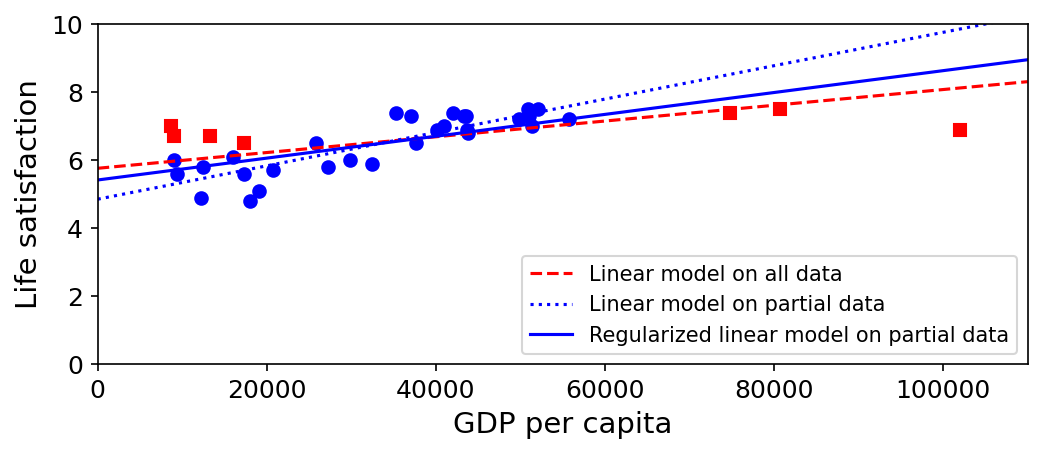

In [13]:
plt.figure(figsize=(8,3))

plt.xlabel("GDP per capita")
plt.ylabel('Life satisfaction')

plt.plot(list(sample_data["GDP per capita"]), list(sample_data["Life satisfaction"]), "bo")
plt.plot(list(missing_data["GDP per capita"]), list(missing_data["Life satisfaction"]), "rs")

X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full + t1full * X, "r--", label="Linear model on all data")
plt.plot(X, t0 + t1*X, "b:", label="Linear model on partial data")

ridge = linear_model.Ridge(alpha=10**9.5)
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
ridge.fit(Xsample, ysample)
t0ridge, t1ridge = ridge.intercept_[0], ridge.coef_[0][0]
plt.plot(X, t0ridge + t1ridge * X, "b", label="Regularized linear model on partial data")

plt.legend(loc="lower right")
plt.axis([0, 110000, 0, 10])
plt.show()

The amount of regularization to apply during learning can be controlled by a **hyperparameter**. A hyperparameter is a parameter of a learning algorithm (not of the model). As such, it is not affected by the learning algorithm itself; it must be set prior to training and remains constant during training. If you set the regularization hyperparameter to a very large value, you will get an almost flat model (a slope close to zero); the learning algorithm will almost certainly not overfit the training data, but it will be less likely to find a good solution. Tuning hyperparameters is an important part of building a Machine Learning system.



## Underfitting the Training Data

Underfitting is the opposite of overfitting: occurs when your model is too simple to learn the underlying structure of the data. For example, a linear model of life satisfaction is prone to underfit; reality is just more complex than the model, so its predictions are bound to be inaccurate, even on the training examples.

Here are the main options for fixing this problem:

*   Select a more powerful model, with more parameters.

*   Feed better features to the learning algorithm (feature engineering).

*   Reduce the constraints on the model (e.g., reduce the regularization hyperparameter).

## Stepping Back

By now you know a lot about Machine Learning. However, we went through so many concepts that you may be feeling a little lost, so let‚Äôs step back and look at the big picture:

*   Machine Learning is about making machines get better at some task by learning from data, instead of having to explicitly code rules.

*   There are many different types of ML systems: supervised or not, batch or online, instance-based or model-based.

*   In an ML project you gather data in a training set, and you feed the training set to a learning algorithm. If the algorithm is model-based, it tunes some parameters to fit the model to the training set (i.e., to make good predictions on the training set itself), and then hopefully it will be able to make good predictions on new cases as well. If the algorithm is instance-based, it just learns the examples by heart and generalizes to new instances by using a similarity measure to compare them to the learned instances.

*   The system will not perform well if your training set is too small, or if the data is not representative, is noisy, or is polluted with irrelevant features (garbage in, garbage out). Lastly, your model needs to be neither too simple (in which case it will underfit) nor too complex (in which case it will overfit).

There‚Äôs just one last important topic to cover: once you have trained a model, you don‚Äôt want to just ‚Äúhope‚Äù it generalizes to new cases. You want to evaluate it and fine-tune it if necessary. 

# Testing and Validating

The only way to know how well a model will generalize to new cases is to actually try it out on new cases. One way to do that is to put your model in production and monitor how well it performs. This works well, but if your model is horribly bad, your users will complain‚Äînot the best idea.

A better option is to split your data into two sets: the **training set** and the **test set**. As these names imply, you train your model using the training set, and you test it using the test set. The error rate on new cases is called the **generalization error** (or out-of-sample error), and by evaluating your model on the test set, you get an estimate of this error. This value tells you how well your model will perform on instances it has never seen before.

If the training error is low (i.e., your model makes few mistakes on the training set) but the generalization error is high, it means that your model is **overfitting** the training data.

## Practical TIP

It is common to use **80%** of the data for training and hold out **20%** for testing. However, this depends on the size of the dataset: if it contains 10 million instances, then holding out 1% means your test set will contain 100,000 instances, probably more than enough to get a good estimate of the generalization error.

## Hyperparameter Tuning and Model Selection

Evaluating a model is simple enough: just use a test set. But suppose you are hesitating between two types of models (say, a linear model and a polynomial model): how can you decide between them? One option is to train both and compare how well they generalize using the test set.

Now suppose that the linear model generalizes better, but you want to apply some regularization to avoid overfitting. The question is, how do you choose the value of the regularization hyperparameter? One option is to train 100 different models using 100 different values for this hyperparameter. Suppose you find the best hyperparameter value that produces a model with the lowest generalization error‚Å†‚Äîsay, just 5% error. You launch this model into production, but unfortunately it does not perform as well as expected and produces 15% errors. What just happened?

The problem is that you measured the generalization error multiple times on the test set, and you adapted the model and hyperparameters to produce the best model for that particular set. This means that the model is unlikely to perform as well on new data.

A common solution to this problem is called **holdout validation**: you simply hold out part of the training set to evaluate several candidate models and select the best one. The new held-out set is called the **validation set** (or sometimes the **development set**, or dev set). More specifically, you train multiple models with various hyperparameters on the reduced training set (i.e., the full training set minus the validation set), and you select the model that performs best on the validation set. After this holdout validation process, you train the best model on the full training set (including the validation set), and this gives you the final model. Lastly, you evaluate this final model on the test set to get an estimate of the generalization error.

This solution usually works quite well. However, if the validation set is too small, then model evaluations will be imprecise: you may end up selecting a suboptimal model by mistake. Conversely, if the validation set is too large, then the remaining training set will be much smaller than the full training set. Why is this bad? Well, since the final model will be trained on the full training set, it is not ideal to compare candidate models trained on a much smaller training set. It would be like selecting the fastest sprinter to participate in a marathon. One way to solve this problem is to perform repeated **cross-validation**, using many small validation sets. Each model is evaluated once per validation set after it is trained on the rest of the data. By averaging out all the evaluations of a model, you get a much more accurate measure of its performance. There is a drawback, however: the **training time is multiplied by the number of validation sets**.

#Last but not the Least: NO FREE LUNCH THEOREM

A model is a simplified version of the observations. The simplifications are meant to discard the superfluous details that are unlikely to generalize to new instances. To decide what data to discard and what data to keep, you must make assumptions. For example, a linear model makes the assumption that the data is fundamentally linear and that the distance between the instances and the straight line is just noise, which can safely be ignored.

In a famous 1996 paper, David Wolpert demonstrated that if you make absolutely no assumption about the data, then there is no reason to prefer one model over any other. This is called the **No Free Lunch (NFL) theorem**. For some datasets the best model is a linear model, while for other datasets it is a neural network. There is no model that is a priori guaranteed to work better (hence the name of the theorem). The only way to know for sure which model is best is to evaluate them all. Since this is not possible, in practice you make some reasonable assumptions about the data and evaluate only a few reasonable models. For example, for simple tasks you may evaluate linear models with various levels of regularization, and for a complex problem you may evaluate various neural networks.